## Libraries

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import EngFormatter

In [2]:
df1= pd.read_csv(r"GBvideos.csv")


In [3]:
file_path = 'GB_category_id.json'

In [4]:
with open(file_path, 'r') as f:
    data = json.load(f)

In [5]:
df2 = pd.DataFrame(data["items"])


## Data Cleaning

In [6]:
rows = []
for item in data["items"]:
    row = {
        "id": item["id"],
        "title": item["snippet"]["title"]
    }
    rows.append(row)

In [7]:
category_df = pd.DataFrame(rows)
category_df

,id,title
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [8]:
df1["category_id"] = df1["category_id"].astype(int)
category_df["id"] = category_df["id"].astype(int)


In [9]:
df = pd.merge(df1, category_df, how="left", left_on="category_id", right_on="id")


In [10]:
df.head()

,video_id,trending_date,title_x,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,id,title_y
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,26.0,Howto & Style
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,24.0,Entertainment
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,10.0,Music
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,17.0,Sports
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,25.0,News & Politics


In [11]:
df.drop(columns=['id'], inplace=True)

In [12]:
df.columns

Index(['video_id', 'trending_date', 'title_x', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'title_y'],
      dtype='object')

In [13]:
df =df[['video_id', 'trending_date', 'title_x', 'channel_title', 'category_id', 'title_y',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description']]

In [14]:
df.rename(columns={'title_y': 'category'}, inplace=True)

In [15]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')


In [16]:
df['engagement'] = df['likes'] + df['dislikes'] + df['comment_count']

## Data Visualization

In [17]:
total_engagement = df.groupby(['channel_title']) ['engagement'].sum().reset_index()
total_engagement.head(10)

,channel_title,engagement
0,- camilla,11056
1,09W HYPE,8484
2,"14,999,999 views",1367
3,1theK (원더케이),29800879
4,20th Century Fox,31676489
5,21SavageVEVO,17712921
6,2CELLOS,1827373
7,2ChainzVEVO,8111701
8,2ndJerma,46839
9,494ta,18209


In [18]:
top_channels = total_engagement.sort_values('engagement', ascending=False).head()
top_channels

,channel_title,engagement
1516,ibighit,329506790
236,ChildishGambinoVEVO,173408338
342,DrakeVEVO,160789002
758,Logan Paul Vlogs,137689775
1532,jypentertainment,117886369


In [19]:
top_channels.engagement = top_channels.engagement/1000000
top_channels

,channel_title,engagement
1516,ibighit,329.506790
236,ChildishGambinoVEVO,173.408338
342,DrakeVEVO,160.789002
758,Logan Paul Vlogs,137.689775
1532,jypentertainment,117.886369


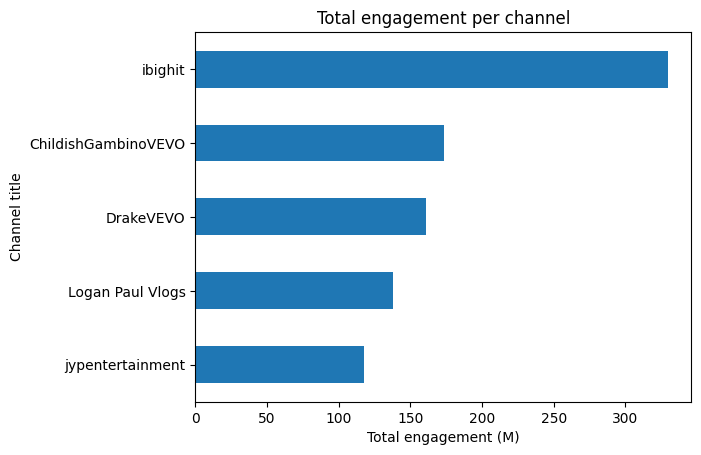

In [20]:
top_channels.sort_values('engagement').plot(x='channel_title', y='engagement', kind='barh',legend=False, xlabel='Total engagement (M)', ylabel='Channel title', title = 'Total engagement per channel');

In [21]:
top_category = df['category'].value_counts().head(10).sort_values(ascending=True)
top_category

category
Pets & Animals        534
News & Politics      1225
Gaming               1788
Comedy               1828
Sports               1907
Howto & Style        1928
Film & Animation     2577
People & Blogs       2926
Entertainment        9124
Music               13754
Name: count, dtype: int64

<Axes: title={'center': 'Top Category based on Engagement'}, ylabel='category'>

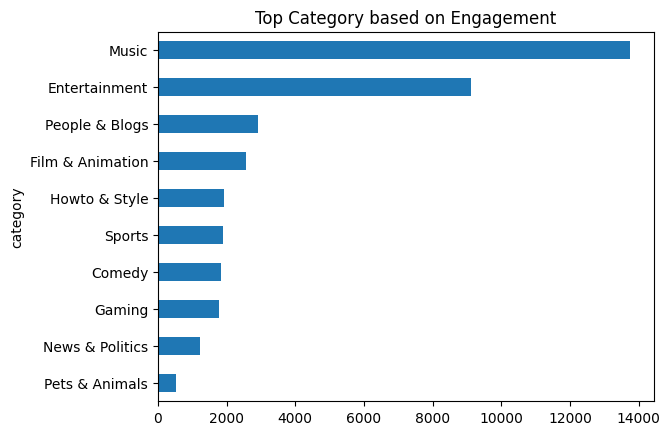

In [22]:
top_category.plot(kind='barh', title='Top Category based on Engagement')

In [23]:
df['day_of_week'] = df['publish_time'].dt.day_name()
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])

In [24]:
weekend_engagement = df.groupby('is_weekend')[['views']].mean().reset_index()
weekend_engagement['type'] = weekend_engagement['is_weekend'].map({True: 'Weekend', False: 'Weekday'})


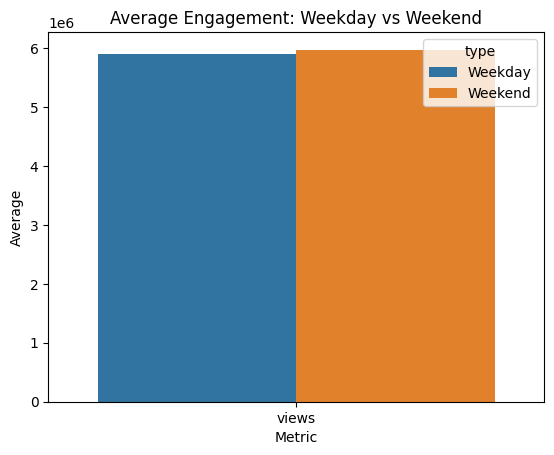

In [25]:
weekend_engagement_plot = weekend_engagement.melt(id_vars='type', value_vars=['views'], 
                                                  var_name='Metric', value_name='Average')
sns.barplot(data=weekend_engagement_plot, x='Metric', y='Average', hue='type')
plt.title('Average Engagement: Weekday vs Weekend')
plt.show()

In [26]:
weekend_engagement = (
    df.groupby(['category', 'is_weekend'])[['views']]
    .mean()
    .reset_index()
)
weekend_engagement['type'] = weekend_engagement['is_weekend'].map({True: 'Weekend', False: 'Weekday'})



In [27]:
weekend_engagement.sort_values(by ='views', ascending=False)

,category,is_weekend,views,type
14,Music,True,2.541367e+07,Weekend
13,Music,False,1.164988e+07,Weekday
18,People & Blogs,True,4.050171e+06,Weekend
7,Film & Animation,False,3.648116e+06,Weekday
6,Entertainment,True,3.607678e+06,Weekend
21,Science & Technology,False,3.315903e+06,Weekday
5,Entertainment,False,3.213152e+06,Weekday
1,Comedy,False,2.238389e+06,Weekday
24,Sports,False,1.784211e+06,Weekday
2,Comedy,True,1.691075e+06,Weekend


In [28]:
# Get top 5 categories by average views (overall)
top5_categories = (
    weekend_engagement.groupby('category')['views']
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .index
)

top5_data = weekend_engagement[weekend_engagement['category'].isin(top5_categories)]
top5_data

,category,is_weekend,views,type
5,Entertainment,False,3.213152e+06,Weekday
6,Entertainment,True,3.607678e+06,Weekend
7,Film & Animation,False,3.648116e+06,Weekday
8,Film & Animation,True,1.595769e+06,Weekend
13,Music,False,1.164988e+07,Weekday
14,Music,True,2.541367e+07,Weekend
17,People & Blogs,False,1.389101e+06,Weekday
18,People & Blogs,True,4.050171e+06,Weekend
21,Science & Technology,False,3.315903e+06,Weekday
22,Science & Technology,True,1.409668e+06,Weekend


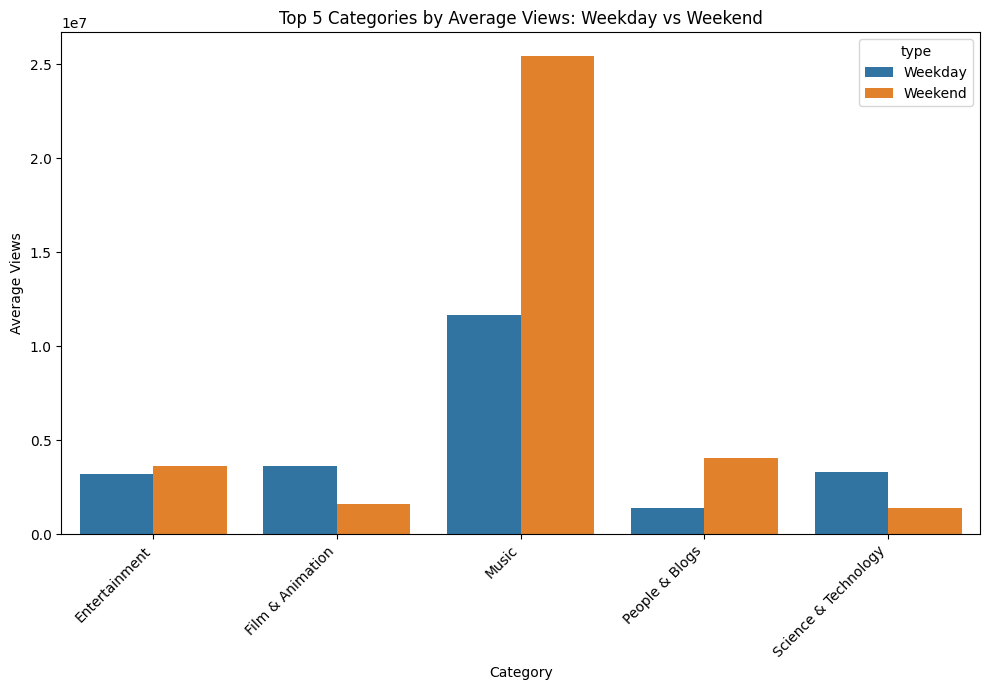

In [29]:
plt.figure(figsize=(10,7))
sns.barplot(data=top5_data, x='category', y='views', hue='type')

plt.title('Top 5 Categories by Average Views: Weekday vs Weekend')
plt.xlabel('Category')
plt.ylabel('Average Views')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [30]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df = df[df['publish_time'].dt.year >= 2016]

top_categories = df.groupby('category')['views'].sum().sort_values(ascending=False).head(5).index.tolist()


In [31]:
df_top10 = df[df['category'].isin(top_categories)]

category_engagement = df_top10.groupby(['category', 'publish_time'])[['views','likes','comment_count']].mean().reset_index()


In [32]:
df['year'] = df['publish_time'].dt.year


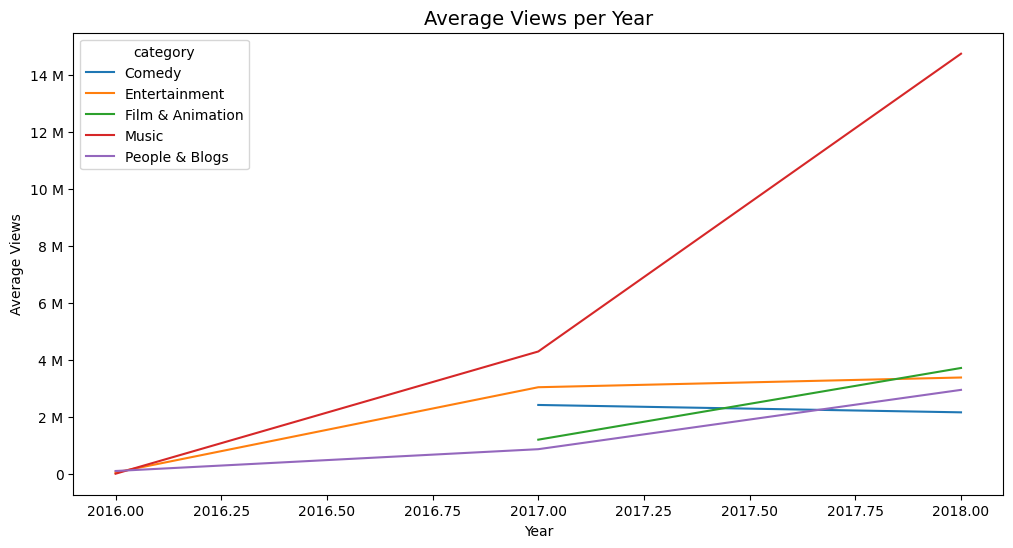

In [33]:
top_categories = df.groupby('category')['views'].sum().sort_values(ascending=False).head(5).index.tolist()
df_top10 = df[df['category'].isin(top_categories)]

category_engagement = df_top10.groupby(['category', 'year'])[['views','likes','comment_count']].mean().reset_index()


plt.figure(figsize=(12,6))
sns.lineplot(data=category_engagement, x='year', y='views', hue='category')
plt.title('Average Views per Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average Views')
plt.gca().yaxis.set_major_formatter(EngFormatter())
plt.show()


In [34]:
corr = df.select_dtypes(include='number').corr()

corr = corr.round(2)
corr

,category_id,views,likes,dislikes,comment_count,engagement,year
category_id,1.00,-0.17,-0.18,-0.02,-0.06,-0.16,-0.14
views,-0.17,1.00,0.80,0.39,0.47,0.77,0.13
likes,-0.18,0.80,1.00,0.45,0.74,0.98,0.12
dislikes,-0.02,0.39,0.45,1.00,0.77,0.59,0.02
comment_count,-0.06,0.47,0.74,0.77,1.00,0.84,0.06
engagement,-0.16,0.77,0.98,0.59,0.84,1.00,0.11
year,-0.14,0.13,0.12,0.02,0.06,0.11,1.00


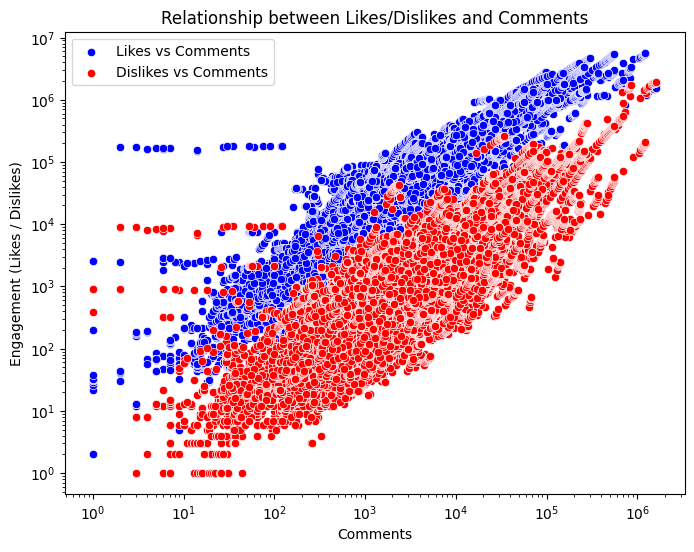

In [35]:
plt.figure(figsize = (8,6))

sns.scatterplot(
    df,
    x='comment_count',
    y='likes',
    color='blue',
    label='Likes vs Comments'
)

sns.scatterplot(
    df,
    x='comment_count',
    y='dislikes',
    color='red',
    label='Dislikes vs Comments'
)

plt.title('Relationship between Likes/Dislikes and Comments')
plt.xlabel('Comments')
plt.ylabel('Engagement (Likes / Dislikes)')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()
                

## Analysis & Key Finidngs

### 1. Top channels based on engagements
The most engaging channels are those that consistently receive high likes, 
dislikes, comments, and views, indicating strong audience loyalty. Based on 
these results we wanted to look into the top categories.

### 2. Top category (music, sports, news, gaming, etc.)

The Music category dominates in total views and engagements, showing that
entertainment-focused content draws the largest audience in GB. This 
further confirms out first analysis of Top channels as it had Music channels 
in the list as a majority.

### 3. Weekend vs. Weekday performance
 The General comparison shows little to no difference between the average 
views on both days.

### 4.Weekend vs. Weekday Performance (Based on Categories)
Videos uploaded on weekends generally attract higher average views across 
most categories, especially Music and Entertainment, indicating stronger 
audience engagement during leisure days.

### 5. Fastest growth in engagement over time
While Music shows the strongest growth in average views over time, 
Comedy appears to be declining slightly. However, due to the limited 
timeframe of the dataset, this trend cannot be confirmed with certainty but 
indicates a possible drop in engagement for comedy content.

### 6. Relationship between comments and likes/dislikes
A strong positive correlation between comments and likes suggests that 
higher engagement often aligns with positive audience sentiment.